# CNN + Random Forest

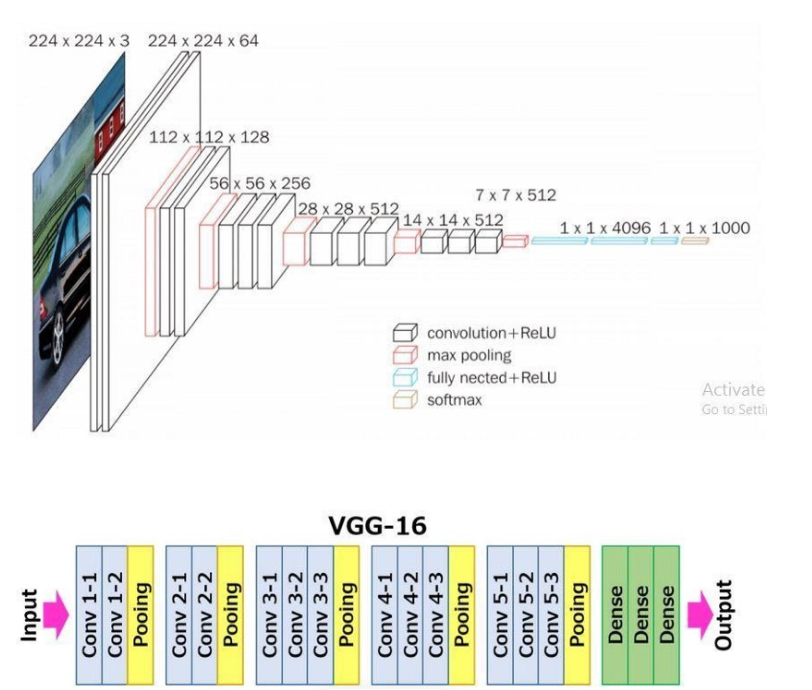

**VGG16 is object detection and classification algorithm which is able to classify 1000 images of 1000 different categories with 92.7% accuracy. It is one of the popular algorithms for image classification and is easy to use with transfer learning.**

**The 16 in VGG16 refers to 16 layers that have weights. In VGG16 there are thirteen convolutional layers, five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer.**

**VGG16 takes input tensor size as 224, 244 with 3 RGB channel.**

**Most unique thing about VGG16 is that instead of having a large number of hyper-parameters they focused on having convolution layers of 3x3 filter with stride 1 and always used the same padding and maxpool layer of 2x2 filter of stride 2.**

**The convolution and max pool layers are consistently arranged throughout the whole architecture
Conv-1 Layer has 64 number of filters, Conv-2 has 128 filters, Conv-3 has 256 filters, Conv 4 and Conv 5 has 512 filters.
Three Fully-Connected (FC) layers follow a stack of convolutional layers: the first two have 4096 channels each, the third performs 1000-way ILSVRC classification and thus contains 1000 channels (one for each class). The final layer is the soft-max layer.**

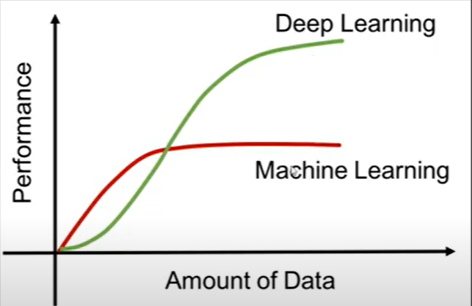

**As you can see when we have limited training data, applying Machine Learning can be better choice than Deep Learning.**

**If we have lots of training data, Deep Learning will be better choice than Machine Learning.**

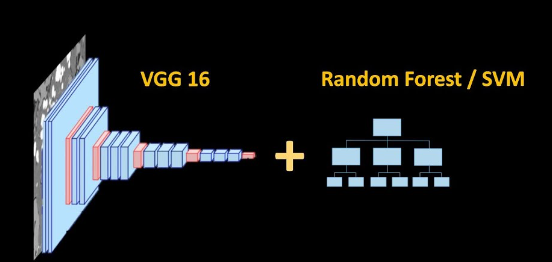

**We can create the solution the combine DL and ML to get the meaningful and more accurate results.**

**We will extract the features with CNN, and then classify with Random Forest or another classifier.**

# 1 . Importing libraries

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os
import random
import cv2
import tensorflow as tf
from warnings import filterwarnings
filterwarnings('ignore')


# 2 . Getting dataset

**You can download the dataset from https://www.kaggle.com/datasets/puneet6060/intel-image-classification**

# 3 . Describing dataset

In [381]:
# Define the dataset directory
DATASET_PATH = "datasets/intel-dataset/seg_test/seg_test/"
CLASSES = {i:j for i,j in zip(range(len(os.listdir(DATASET_PATH))),os.listdir(DATASET_PATH))}

In [382]:
CLASSES

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [383]:
nums_cls_list = []
for cls in CLASSES.values():
    num_cls = len(os.listdir(os.path.join(DATASET_PATH,cls)))
    print(f"There are {num_cls} samples on {cls} class")
    nums_cls_list.append(num_cls)

There are 437 samples on buildings class
There are 474 samples on forest class
There are 553 samples on glacier class
There are 525 samples on mountain class
There are 510 samples on sea class
There are 501 samples on street class


In [384]:
print(f"There are {sum(nums_cls_list)} total samples")

There are 3000 total samples


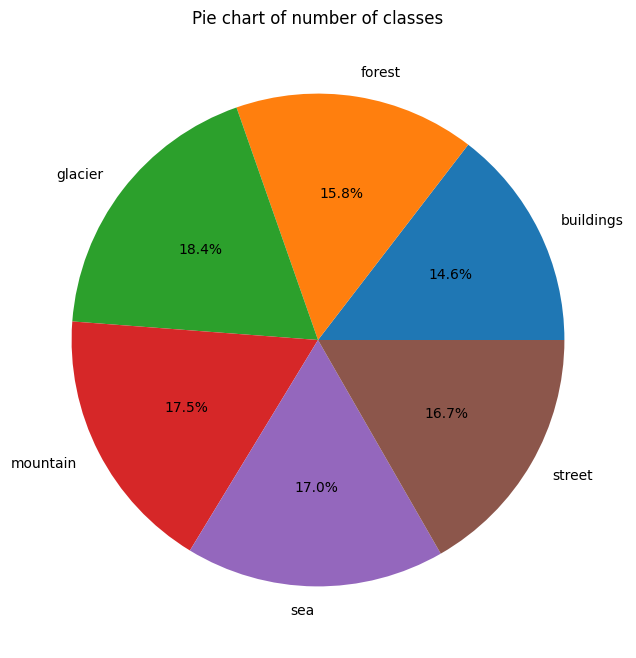

In [385]:
plt.figure(figsize=(8,8))
plt.title("Pie chart of number of classes")
plt.pie(nums_cls_list,labels=CLASSES.values(),autopct="%1.1f%%");

# 4 . Display images

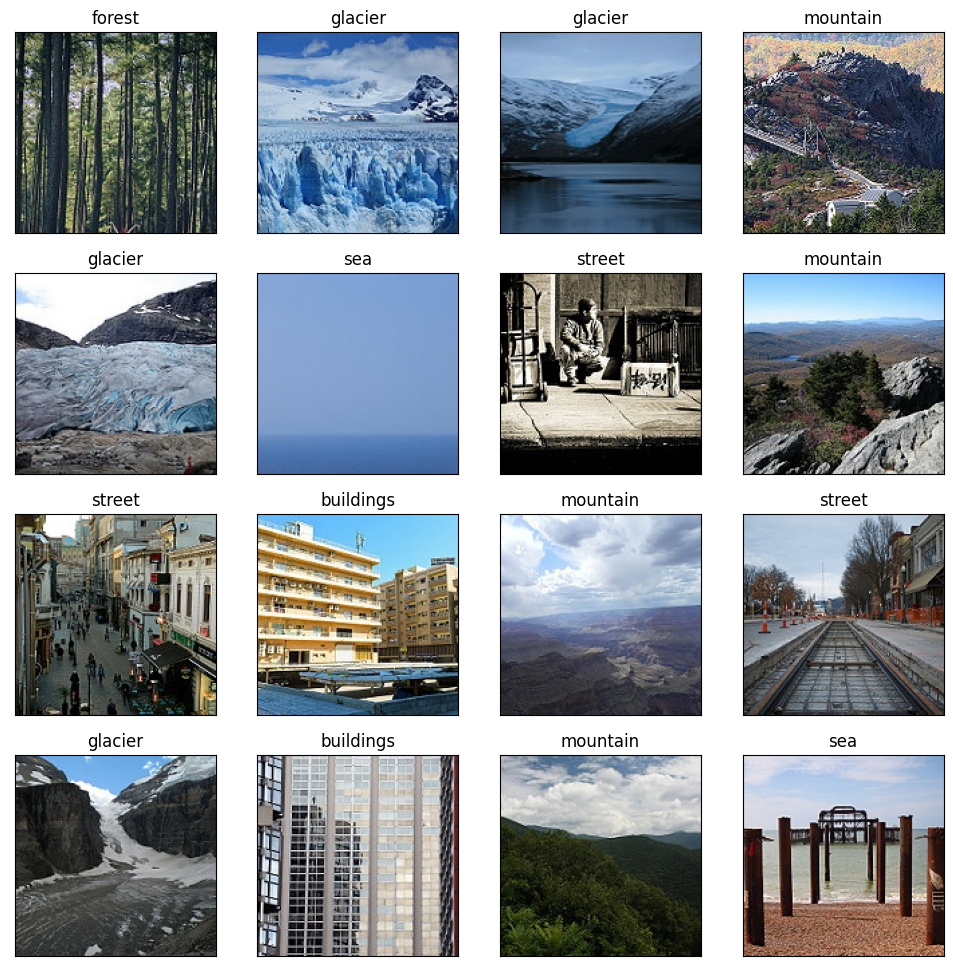

In [386]:
plt.figure(figsize=(12,12))

for i in range(1,17):
    rand_num = random.randint(0,sum(nums_cls_list)-1)
    img_path = glob.glob(DATASET_PATH+"*/*")[rand_num]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    cls = img_path.split("\\")[-2]
    # print(img_path)
    # print(cls)
    
    plt.subplot(4,4,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(cls)


# 5 . Preparing the dataset

**We will have 80 images for each classes.**

**We will get totally 480 images for 6 classes.**

In [486]:
TRAIN_IMAGES = []
TRAIN_LABELS = []

for cls_path in glob.glob(DATASET_PATH+"*"):
    label = cls_path.split("\\")[-1]
    #print(cls_path)
    
    for img_path in glob.glob(cls_path+"/*")[:80]:
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(128,128))
        TRAIN_IMAGES.append(img)
        TRAIN_LABELS.append(label)
        
TRAIN_IMAGES = np.array(TRAIN_IMAGES)
TRAIN_LABELS = np.array(TRAIN_LABELS)
        
    

In [487]:
print(TRAIN_IMAGES.shape)
print(TRAIN_LABELS.shape)

(480, 128, 128, 3)
(480,)


Text(0.5, 1.0, 'buildings')

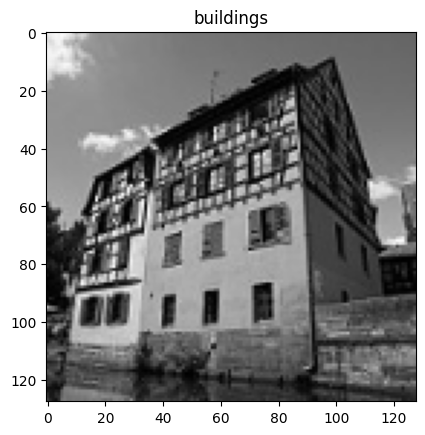

In [490]:
plt.imshow(TRAIN_IMAGES[35])
plt.title(TRAIN_LABELS[35])

In [491]:
TRAIN_LABELS[:20]

array(['buildings', 'buildings', 'buildings', 'buildings', 'buildings',
       'buildings', 'buildings', 'buildings', 'buildings', 'buildings',
       'buildings', 'buildings', 'buildings', 'buildings', 'buildings',
       'buildings', 'buildings', 'buildings', 'buildings', 'buildings'],
      dtype='<U9')

# 6 . Encoding the classes

In [492]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
TRAIN_LABELS_ENCODED = le.fit_transform(TRAIN_LABELS)

In [493]:
TRAIN_LABELS_ENCODED

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [496]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(TRAIN_IMAGES,TRAIN_LABELS_ENCODED,
                                                 test_size=0.25,random_state=42,shuffle=True)

In [497]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(360, 128, 128, 3)
(360,)
(120, 128, 128, 3)
(120,)


In [498]:
TRAIN_IMAGES[5]

array([[[180, 188, 191],
        [179, 186, 189],
        [177, 182, 186],
        ...,
        [114, 139, 169],
        [114, 139, 169],
        [113, 138, 168]],

       [[184, 191, 194],
        [183, 189, 193],
        [181, 186, 190],
        ...,
        [119, 143, 174],
        [118, 143, 173],
        [117, 142, 173]],

       [[185, 190, 194],
        [185, 190, 194],
        [184, 189, 193],
        ...,
        [115, 140, 171],
        [114, 139, 170],
        [114, 139, 170]],

       ...,

       [[ 86,  85,  81],
        [ 88,  87,  83],
        [ 92,  91,  87],
        ...,
        [ 95, 102,  50],
        [110, 117,  62],
        [ 95, 103,  46]],

       [[ 86,  85,  83],
        [ 81,  80,  78],
        [ 72,  72,  69],
        ...,
        [109, 118,  62],
        [148, 157, 100],
        [ 73,  82,  25]],

       [[ 83,  83,  81],
        [ 69,  69,  67],
        [ 81,  81,  79],
        ...,
        [ 99, 108,  51],
        [106, 115,  58],
        [ 68,  77,  20]]

# 7 . Scaling the images

**We can use StandartScalar or MinMaxScalar.**

**StandardScaler is useful for the features that follow a Normal distribution.Therefore, it makes mean = 0 and scales the data to unit variance.**

**MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge.MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.This scaling compresses all the inliers in the narrow range.**

Text(0.5, 1.0, 'Distribution of All Images')

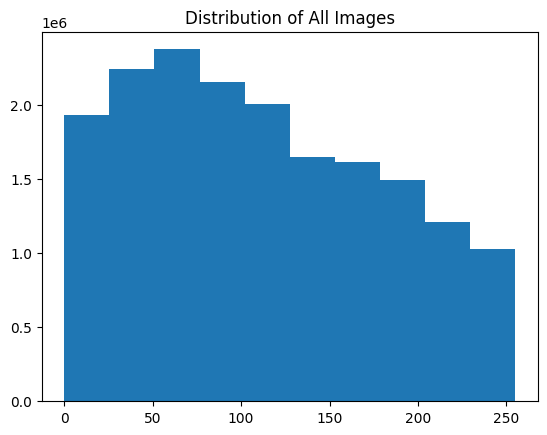

In [499]:
plt.hist(X_train.flatten())
plt.title("Distribution of All Images")

In [500]:
X_train[25]

array([[[167, 194, 213],
        [166, 193, 212],
        [166, 193, 212],
        ...,
        [170, 183, 192],
        [170, 183, 192],
        [169, 182, 191]],

       [[167, 194, 213],
        [167, 194, 213],
        [166, 193, 213],
        ...,
        [171, 184, 193],
        [170, 183, 192],
        [170, 183, 192]],

       [[167, 194, 213],
        [167, 194, 213],
        [167, 194, 215],
        ...,
        [170, 183, 192],
        [169, 183, 192],
        [169, 182, 192]],

       ...,

       [[ 87,  90,  50],
        [110, 108,  69],
        [109, 102,  66],
        ...,
        [ 55,  51,  19],
        [ 82,  77,  41],
        [ 73,  68,  27]],

       [[ 65,  70,  33],
        [118, 115,  80],
        [112, 100,  66],
        ...,
        [ 56,  52,  27],
        [ 83,  77,  49],
        [ 58,  53,  20]],

       [[ 67,  73,  39],
        [132, 128,  97],
        [103,  86,  55],
        ...,
        [ 49,  47,  25],
        [ 64,  61,  37],
        [ 45,  41,  12]]

**As you can see, images do not have normal distribution. We can apply MinMaxScalar**

**NOTE : Let's say batch:(N x H x W,Ch). MinMaxScaler takes the input and gives the output as (N x H x W,Ch)**

In [501]:
from sklearn.preprocessing import MinMaxScaler
# Scaling the values to between (0,1)

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train.reshape(-1,3)).reshape(-1,128,128,3)
X_test = scaler.fit_transform(X_test.reshape(-1,3)).reshape(-1,128,128,3)


In [502]:
print(X_train.shape)
print(X_test.shape)

(360, 128, 128, 3)
(120, 128, 128, 3)


In [503]:
X_train[25]

array([[[0.65490196, 0.76078431, 0.83529412],
        [0.65098039, 0.75686275, 0.83137255],
        [0.65098039, 0.75686275, 0.83137255],
        ...,
        [0.66666667, 0.71764706, 0.75294118],
        [0.66666667, 0.71764706, 0.75294118],
        [0.6627451 , 0.71372549, 0.74901961]],

       [[0.65490196, 0.76078431, 0.83529412],
        [0.65490196, 0.76078431, 0.83529412],
        [0.65098039, 0.75686275, 0.83529412],
        ...,
        [0.67058824, 0.72156863, 0.75686275],
        [0.66666667, 0.71764706, 0.75294118],
        [0.66666667, 0.71764706, 0.75294118]],

       [[0.65490196, 0.76078431, 0.83529412],
        [0.65490196, 0.76078431, 0.83529412],
        [0.65490196, 0.76078431, 0.84313725],
        ...,
        [0.66666667, 0.71764706, 0.75294118],
        [0.6627451 , 0.71764706, 0.75294118],
        [0.6627451 , 0.71372549, 0.75294118]],

       ...,

       [[0.34117647, 0.35294118, 0.19607843],
        [0.43137255, 0.42352941, 0.27058824],
        [0.42745098, 0

# 8 . One-Hot-Encoded Categories

In [504]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(360, 6)
(120, 6)


# 9 . Build the CNN Model and get features

In [505]:
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,Flatten,Dropout

feature_extractor = tf.keras.models.Sequential()
feature_extractor.add(Conv2D(filters=64,kernel_size=3,activation='sigmoid',padding='same',input_shape=(128,128,3)))
feature_extractor.add(BatchNormalization())
feature_extractor.add(Conv2D(filters=64,kernel_size=3,activation='sigmoid',padding='same',kernel_initializer="he_uniform"))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPool2D(pool_size=(2,2)))
feature_extractor.add(Conv2D(filters=128,kernel_size=3,activation='sigmoid',padding='same',kernel_initializer="he_uniform"))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPool2D(pool_size=(2,2)))
feature_extractor.add(Flatten())
feature_extractor.summary()                      


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization_19 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_20 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                      

In [506]:
X_train_features = feature_extractor.predict(X_train,batch_size=4)

90/90 [==============================] - 5s 57ms/step


In [507]:
X_train_features.shape

(360, 131072)

**(400, 131072) means X_train has 400 images and each images has 131072 features.**

In [508]:
X_test_features = feature_extractor.predict(X_test,batch_size=4)
print(X_test_features.shape)

30/30 [==============================] - 2s 58ms/step
(120, 131072)


# 9 . Classifying with Random Forest by using features

In [509]:
X_train_features.shape

(360, 131072)

In [510]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50,random_state=42)
rf_model.fit(X_train_features,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [511]:
pred = rf_model.predict(X_test_features)

In [512]:
pred[:10]

array([1, 1, 3, 3, 0, 2, 2, 4, 1, 1], dtype=int64)

In [538]:
from sklearn.metrics import accuracy_score,confusion_matrix

rf_accuracy = accuracy_score(y_test,pred)
print(rf_accuracy)

0.5583333333333333


<AxesSubplot: >

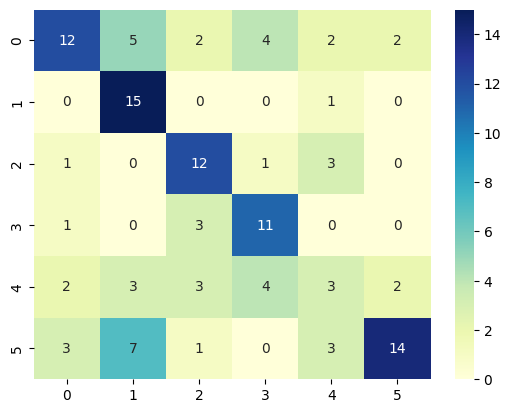

In [514]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap="YlGnBu")

# 10 . Training CNN Model

In [534]:
x = tf.keras.layers.Dense(128,activation='sigmoid')(feature_extractor.output)
pred_layer = tf.keras.layers.Dense(6,activation='softmax')(x)
cnn_model = tf.keras.models.Model(inputs=feature_extractor.input,outputs=pred_layer)
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [535]:
history = cnn_model.fit(X_train,y_train_one_hot,batch_size=4,epochs=50,validation_data=(X_test,y_test_one_hot))

Epoch 1/50
90/90 [==============================] - 47s 516ms/step - loss: 1.9313 - accuracy: 0.3361 - val_loss: 1.5809 - val_accuracy: 0.3750
Epoch 2/50
90/90 [==============================] - 47s 518ms/step - loss: 1.3855 - accuracy: 0.4389 - val_loss: 1.5210 - val_accuracy: 0.4167
Epoch 3/50
90/90 [==============================] - 47s 521ms/step - loss: 1.5012 - accuracy: 0.4056 - val_loss: 1.4495 - val_accuracy: 0.4250
Epoch 4/50
90/90 [==============================] - 47s 520ms/step - loss: 1.3402 - accuracy: 0.4972 - val_loss: 1.4779 - val_accuracy: 0.3250
Epoch 5/50
90/90 [==============================] - 46s 517ms/step - loss: 1.2579 - accuracy: 0.5111 - val_loss: 1.3917 - val_accuracy: 0.4417
Epoch 6/50
90/90 [==============================] - 47s 518ms/step - loss: 1.3146 - accuracy: 0.4833 - val_loss: 2.5905 - val_accuracy: 0.1667
Epoch 7/50
90/90 [==============================] - 47s 522ms/step - loss: 1.2669 - accuracy: 0.4667 - val_loss: 1.2830 - val_accuracy: 0.4750

# 11 . Displaying the training results

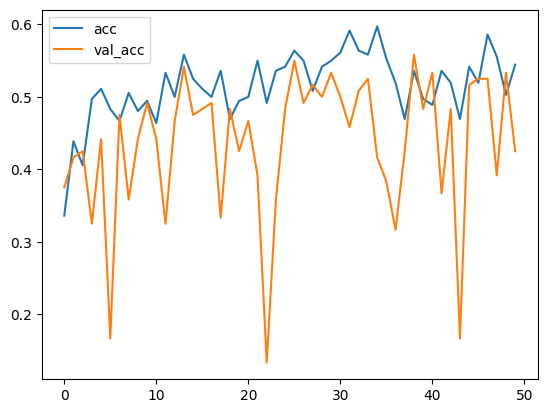

In [544]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc)
plt.plot(val_acc)
plt.legend(["acc","val_acc"])

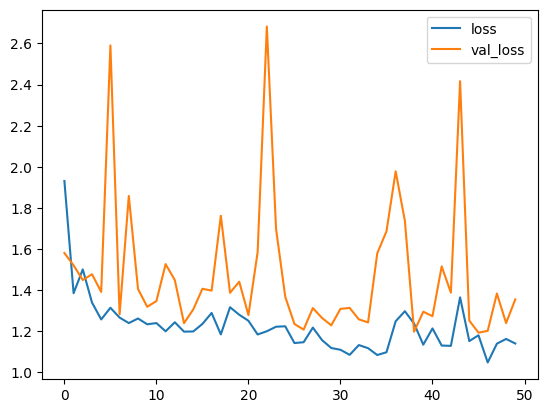

In [545]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(["loss","val_loss"])

# 12 . Accuracy of only CNN Model

In [635]:
cnn_accuracy=cnn_model.evaluate(X_test,y_test_one_hot)[1]
print(cnn_accuracy)

4/4 [==============================] - 3s 695ms/step - loss: 1.3555 - accuracy: 0.4250
0.42500001192092896


# 13 . VGG16 

In [587]:
from keras.applications.vgg16 import VGG16
vgg16_model = VGG16(include_top=False,weights='imagenet',input_shape=(128,128,3))

# Freezing the layers for gradients
for layer in vgg16_model.layers:
    layer.trainable = False
    
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [613]:
x1 = Flatten()(vgg16_model.output)
pred_layer_vgg = tf.keras.layers.Dense(6,activation='softmax')(x1)
model_vgg = tf.keras.models.Model(inputs = vgg16_model.input,outputs=pred_layer_vgg)

model_vgg.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_vgg.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

In [614]:
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = []


model_filepath = "model-vgg-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath =model_filepath,
                             save_best_only=True,
                             monitor='val_accuracy',
                             mode='max',
                             verbose=1)

callbacks.append(checkpoint)

In [612]:
del model_vgg

In [615]:
history2 = model_vgg.fit(X_train,
                         y_train_one_hot,
                         batch_size=4,
                         epochs=20,
                         validation_data=(X_test,y_test_one_hot),
                        callbacks=callbacks)

Epoch 1/20
90/90 [==============================] - ETA: 0s - loss: 0.9724 - accuracy: 0.6333
Epoch 1: val_accuracy improved from -inf to 0.74167, saving model to model-vgg-01-0.7417.hdf5
90/90 [==============================] - 14s 156ms/step - loss: 0.9724 - accuracy: 0.6333 - val_loss: 0.6163 - val_accuracy: 0.7417
Epoch 2/20
90/90 [==============================] - ETA: 0s - loss: 0.2999 - accuracy: 0.8944
Epoch 2: val_accuracy improved from 0.74167 to 0.75000, saving model to model-vgg-02-0.7500.hdf5
90/90 [==============================] - 14s 153ms/step - loss: 0.2999 - accuracy: 0.8944 - val_loss: 0.6893 - val_accuracy: 0.7500
Epoch 3/20
90/90 [==============================] - ETA: 0s - loss: 0.1669 - accuracy: 0.9528
Epoch 3: val_accuracy did not improve from 0.75000
90/90 [==============================] - 14s 155ms/step - loss: 0.1669 - accuracy: 0.9528 - val_loss: 0.6008 - val_accuracy: 0.7417
Epoch 4/20
90/90 [==============================] - ETA: 0s - loss: 0.0831 - acc

Text(0.5, 1.0, 'VGG 16 Training Accuracy Scores')

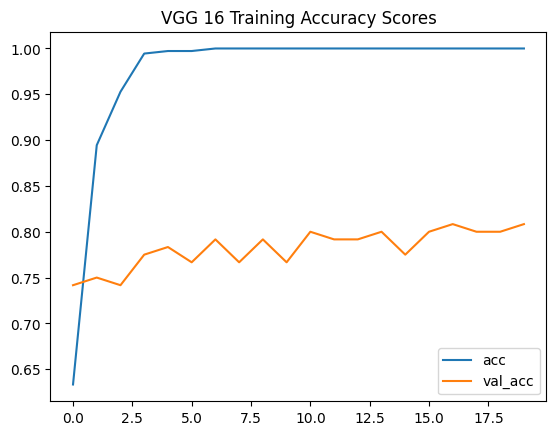

In [616]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
plt.plot(acc2)
plt.plot(val_acc2)
plt.legend(["acc","val_acc"])
plt.title("VGG 16 Training Accuracy Scores")

Text(0.5, 1.0, 'VGG 16 Training Loss Scores')

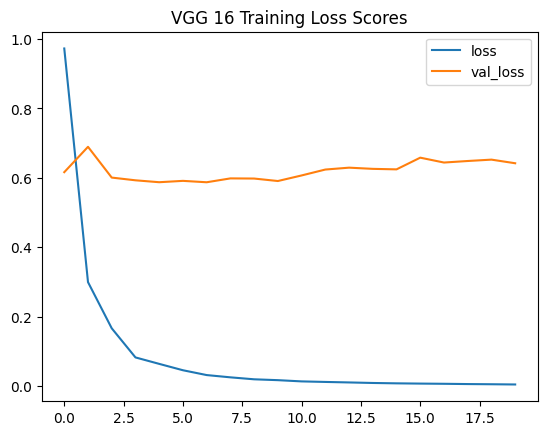

In [617]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
plt.plot(loss2)
plt.plot(val_loss2)
plt.legend(["loss","val_loss"])
plt.title("VGG 16 Training Loss Scores")

In [636]:
# Load the best model to VGG model
model_vgg.load_weights("model-vgg-17-0.8083.hdf5")

In [640]:
vgg_accuracy = model_vgg.evaluate(X_test,y_test_one_hot)[1]
print(vgg_accuracy)

4/4 [==============================] - 8s 2s/step - loss: 0.6441 - accuracy: 0.8083
0.8083333373069763


# 14 . VGG16 + Random Forests

In [625]:
X_train_features_vgg = vgg16_model.predict(X_train)
print(X_train_features_vgg.shape)
X_train_features_vgg = X_train_features_vgg.reshape(X_train.shape[0],-1)
print(X_train_features_vgg.shape)

12/12 [==============================] - 22s 2s/step
(360, 4, 4, 512)
(360, 8192)


In [626]:
X_test_features_vgg = vgg16_model.predict(X_test)
print(X_test_features_vgg.shape)
X_test_features_vgg = X_test_features_vgg.reshape(X_test.shape[0],-1)
print(X_test_features_vgg.shape)

4/4 [==============================] - 8s 2s/step
(120, 4, 4, 512)
(120, 8192)


In [627]:
rf_model2 = RandomForestClassifier(n_estimators=50,random_state=42)
rf_model2.fit(X_train_features_vgg,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [629]:
pred_vgg = rf_model2.predict(X_test_features_vgg)
pred_vgg

array([0, 5, 4, 3, 5, 2, 3, 3, 5, 5, 0, 3, 0, 3, 0, 1, 0, 5, 5, 4, 2, 5,
       0, 3, 1, 5, 4, 2, 2, 0, 3, 0, 2, 5, 4, 1, 3, 2, 1, 0, 4, 2, 1, 2,
       0, 4, 5, 0, 1, 5, 2, 3, 5, 5, 2, 4, 1, 1, 5, 1, 0, 4, 0, 1, 2, 3,
       4, 0, 0, 2, 3, 5, 2, 1, 1, 3, 3, 5, 2, 0, 5, 0, 1, 5, 5, 2, 4, 0,
       0, 2, 0, 5, 4, 5, 0, 5, 1, 3, 5, 0, 4, 5, 1, 5, 4, 2, 5, 5, 5, 0,
       1, 5, 1, 5, 5, 0, 2, 4, 5, 0], dtype=int64)

In [630]:
y_test

array([0, 5, 4, 3, 4, 2, 3, 4, 0, 5, 0, 3, 5, 3, 0, 1, 0, 5, 0, 2, 2, 5,
       0, 3, 1, 5, 4, 4, 3, 0, 4, 0, 4, 5, 4, 1, 3, 2, 5, 0, 4, 2, 1, 2,
       0, 4, 5, 0, 1, 0, 4, 4, 5, 5, 3, 3, 1, 1, 5, 1, 5, 3, 0, 1, 2, 3,
       4, 0, 0, 2, 3, 0, 2, 1, 1, 2, 3, 5, 4, 0, 5, 0, 1, 5, 0, 3, 4, 0,
       4, 2, 5, 2, 2, 5, 0, 5, 1, 2, 5, 0, 4, 5, 1, 5, 2, 2, 5, 0, 5, 0,
       1, 5, 1, 5, 5, 0, 2, 3, 5, 0], dtype=int64)

In [632]:
vgg_rf_accuracy = accuracy_score(pred_vgg,y_test)
print(vgg_rf_accuracy)

0.7416666666666667


# CONCLUSION

In [641]:
print(f"CNN+Random Forest Accuracy : {rf_accuracy}")
print(f"Only CNN Accuracy : {cnn_accuracy}")
print(f"Only VGG16 Accuracy : {vgg_accuracy}")
print(f"VGG16+Random Forest Accuracy : {vgg_rf_accuracy}")

CNN+Random Forest Accuracy : 0.5583333333333333
Only CNN Accuracy : 0.42500001192092896
Only VGG16 Accuracy : 0.8083333373069763
VGG16+Random Forest Accuracy : 0.7416666666666667


**1 . CNN + Random Forest is much faster than only CNN and has more accurate results.**

**2 . Accuracy of VGG16 > Accuracy of VGG16+Random Forest . But VGG16+Random Forest is generally faster than only VGG16.**

**VGG16+Random Forest can get more accuracy score than only VGG16.It depends on lots of things.**

**Number of epochs,number of dataset,number of tree in RF can affect the accuracy and speed of the model.**